In [1]:
# %%
# Samarth Borade
# C009
# BTI SEM 10
# EXP 9: Transfer Learning

# Step 1
from keras.applications import VGG16
import ssl

# Workaround to avoid SSL certificate verification error
ssl._create_default_https_context = ssl._create_unverified_context
# Load VGG16 model
vgg_model = VGG16()
vgg_model.summary()



2024-03-01 00:48:06.332187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-01 00:48:06.332204: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-01 00:48:06.332209: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-01 00:48:06.332238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 00:48:06.332257: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

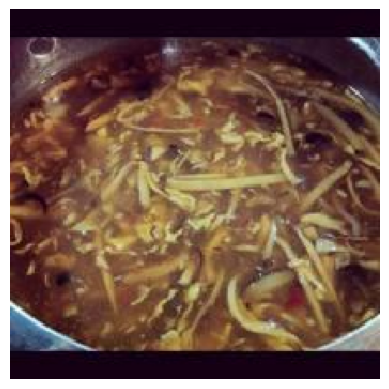

2024-03-01 00:48:51.562269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Predicted class: isopod


In [7]:

# %%

# Step 2
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
# Load and preprocess image
img_path = './TRAIN.1/B/TRAIN.1_BIODEG_ORI_0.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict class of the image
preds = vgg_model.predict(x)
predicted_class = decode_predictions(preds, top=1)[0][0]
print('Predicted class:', predicted_class[1])



In [3]:
# %%
# Step 3
from keras.models import Model

# Customize VGG16 model for feature extraction
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('fc2').output)

# Use model as feature extractor
features = feat_extractor.predict(x)


1/1 [==============================] - 0s 143ms/step


In [4]:
num_layers = len(vgg_model.layers)
print("Number of layers in the model:", num_layers)

Number of layers in the model: 23


In [5]:
# Step 4: Remove the last layer of the model and create a new model
from keras.models import Model

new_vgg_model = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)  # excluding the last layer
num_layers = len(new_vgg_model.layers)
print("Number of layers in the model after removing the last layer:", num_layers)


Number of layers in the model after removing the last layer: 22


In [7]:
from keras.layers import Dense

# Step 5
# Add new layers to the model
x1 = vgg_model.output  # Using the output of the feature extractor as input for new layers
x1 = Dense(128, activation='relu')(x1)
num_classes = 1000  # ImageNet has 1000 classes
predictions = Dense(num_classes, activation='softmax')(x1)

# Summarize the model
new_model = Model(inputs=vgg_model.input, outputs=predictions)

# Step 6
# Predict class of the image using the updated model
new_preds = new_model.predict(x)
new_predicted_class = decode_predictions(new_preds, top=1)[0][0]
print('New Predicted class:', new_predicted_class[1])



1/1 [==============================] - 0s 410ms/step
New Predicted class: pug


In [8]:

# %%
new_model.summary()

# Step 7
# Train the new model for binary classification of images
# Add your code here for training the model


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   